In [ ]:
%matplotlib inline

In [ ]:
import os
import struct
import numpy as np
import sys

 
def load_mnist(path, kind='train'):
    """Load MNIST data from `path`"""
    labels_path = os.path.join(path, 
                               '%s-labels-idx1-ubyte' % kind)
    images_path = os.path.join(path, 
                               '%s-images-idx3-ubyte' % kind)
        
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', 
                                 lbpath.read(8))
        labels = np.fromfile(lbpath, 
                             dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", 
                                               imgpath.read(16))
        images = np.fromfile(imgpath, 
                             dtype=np.uint8).reshape(len(labels), 784)
 
    return images, labels

In [3]:
X_train, y_train = load_mnist('mnist/', kind='train')
print('Rows: %d, columns: %d' % (X_train.shape[0], X_train.shape[1]))

Rows: 60000, columns: 784


In [4]:
X_test, y_test = load_mnist('mnist/', kind='t10k')
print('Rows: %d, columns: %d' % (X_test.shape[0], X_test.shape[1]))
y_test[:3]

Rows: 10000, columns: 784


array([7, 2, 1], dtype=uint8)

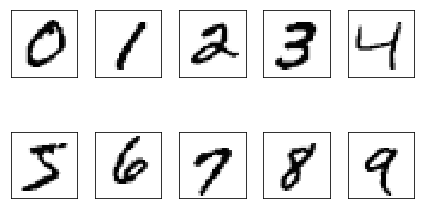

In [5]:
# original
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_all.png', dpi=300)
plt.show()

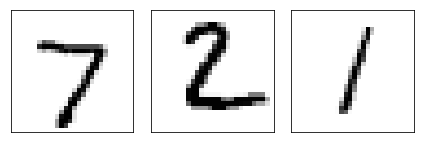

In [6]:
# modified
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(3):
    img = X_test[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_all.png', dpi=300)
plt.show()

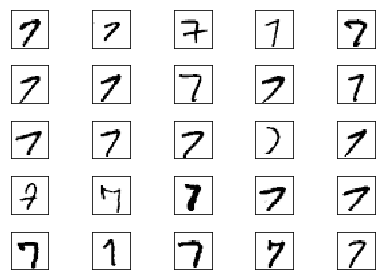

In [7]:
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_7.png', dpi=300)
plt.show()

In [8]:
# np.savetxt('train_img.csv', X_train, fmt='%i', delimiter=',')
# np.savetxt('train_labels.csv', y_train, fmt='%i', delimiter=',')
# X_train = np.genfromtxt('train_img.csv', dtype=int, delimiter=',')
# y_train = np.genfromtxt('train_labels.csv', dtype=int, delimiter=',')

# np.savetxt('test_img.csv', X_test, fmt='%i', delimiter=',')
# np.savetxt('test_labels.csv', y_test, fmt='%i', delimiter=',')
# X_test = np.genfromtxt('test_img.csv', dtype=int, delimiter=',')
# y_test = np.genfromtxt('test_labels.csv', dtype=int, delimiter=',')


<br>
<br>

In [9]:
import numpy as np

a = np.arange(2)
b = a
print('a & b', np.may_share_memory(a, b))

a[0] = 7
print('a & b', np.may_share_memory(a, b))

a = 7
print('a & b', np.may_share_memory(a, b))
print('a is b, M True, B False, Va False', a is b)

a = np.arange(2)
print('a & b', np.may_share_memory(a, b))

a & b True
a & b True
a & b False
a is b, M True, B False, Va False False
a & b False


In [27]:
from neuralnet import NeuralNetMLP


nn = NeuralNetMLP(n_output=10, 
                  n_features=X_train.shape[1], 
                  n_hidden = 50, 
                  l2=0.1, 
                  l1=0.0, 
                  epochs=50, 
                  eta=0.001,
                  alpha=0.001,
                  decrease_const=0.00001,
                  minibatches=50, 
                  shuffle=True,
                  random_state=1)

In [28]:
nn.fit(X_train[:500], y_train[:500], print_progress=True)
#nn.fit(X_test, y_test, print_progress=True)

Epoch: 50/50

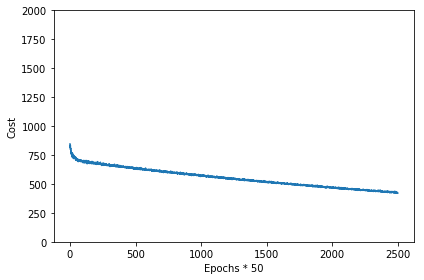

In [29]:
import matplotlib.pyplot as plt

plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylim([0, 2000])
plt.ylabel('Cost')
plt.xlabel('Epochs * 50')
plt.tight_layout()
# plt.savefig('./figures/cost.png', dpi=300)
plt.show()

In [30]:
batches = np.array_split(range(len(nn.cost_)), 10)
cost_ary = np.array(nn.cost_)
cost_avgs = [np.mean(cost_ary[i]) for i in batches]

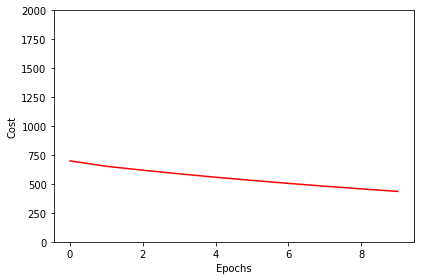

In [31]:
plt.plot(range(len(cost_avgs)), cost_avgs, color='red')
plt.ylim([0, 2000])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
#plt.savefig('./figures/cost2.png', dpi=300)
plt.show()

In [32]:
y_train_pred = nn.predict(X_train)

if sys.version_info < (3, 0):
    acc1 = ((np.sum(y_train == y_train_pred, axis=0)).astype('float') /
           X_train.shape[0])
else:
    acc1 = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]

print('Training accuracy: %.2f%%' % (acc1 * 100))
print('Va 99, B 90, M 70')

print(y_train_pred[:20])
print(y_train[:20])

Training accuracy: 44.41%
Va 99, B 90, M 70
[3 7 4 1 9 8 1 3 1 4 3 5 3 8 1 7 8 8 9 9]
[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


In [16]:
y_test_pred = nn.predict(X_test)

if sys.version_info < (3, 0):
    acc2 = ((np.sum(y_test == y_test_pred, axis=0)).astype('float') /
           X_test.shape[0])
else:
    acc2 = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]

print('Test accuracy: %.2f%%' % (acc2 * 100))
print('Va 30, B 50, M 50')
print('Why better than training?')
print('(acc2 - acc1)*100 = ', (acc2 - acc1)*100 )

Test accuracy: 43.86%
Va 30, B 50, M 50
Why better than training?
(acc2 - acc1)*100 =  -0.5466666666666675


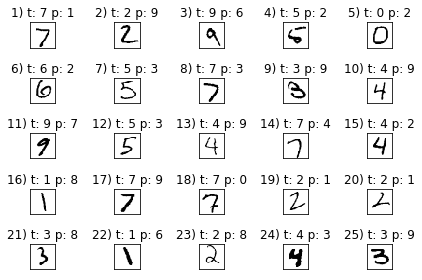

In [17]:
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_miscl.png', dpi=300)
plt.show()

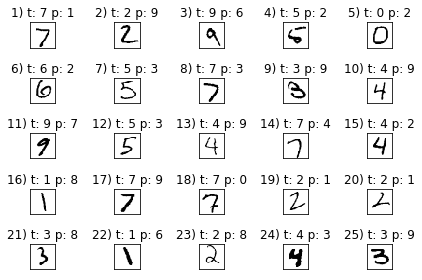

In [18]:
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab= y_test_pred[y_test != y_test_pred][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
# plt.savefig('./figures/mnist_miscl.png', dpi=300)
plt.show()